**Game Sales Data Analysis**

* For this notebook, we are looking to see the factors from the dataset affect the target variable, Global_Sales. We are going to use regression methods to show this.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing our dataset
game_sale = pd.read_csv('/content/drive/MyDrive/DSML/game_sales.csv')

#printing to see if it works
game_sale

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
1995,Disney Fairies: Tinker Bell and the Lost Treasure,DS,2009.0,Adventure,Disney Interactive Studios,0.57,0.35,0.02,0.10,1.04
1996,Mega Man X4,PS,1996.0,Action,Virgin Interactive,0.45,0.30,0.22,0.07,1.04
1997,Naruto: Clash of Ninja 2,GC,2003.0,Fighting,Nintendo,0.44,0.12,0.45,0.03,1.04
1998,Dance Dance Revolution SuperNOVA,PS2,2006.0,Simulation,Konami Digital Entertainment,0.87,0.03,0.00,0.14,1.04


In [ ]:
#head of the dataset
game_sale.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#tail of the dataset
game_sale.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1995,Disney Fairies: Tinker Bell and the Lost Treasure,DS,2009.0,Adventure,Disney Interactive Studios,0.57,0.35,0.02,0.10,1.04
1996,Mega Man X4,PS,1996.0,Action,Virgin Interactive,0.45,0.30,0.22,0.07,1.04
1997,Naruto: Clash of Ninja 2,GC,2003.0,Fighting,Nintendo,0.44,0.12,0.45,0.03,1.04
1998,Dance Dance Revolution SuperNOVA,PS2,2006.0,Simulation,Konami Digital Entertainment,0.87,0.03,0.00,0.14,1.04
1999,Brink,X360,2011.0,Shooter,Bethesda Softworks,0.59,0.35,0.01,0.09,1.04


In [ ]:
#Checking to see if we have any null values (Two ways)
display(game_sale.isnull().any())
display(game_sale.isnull().sum())

Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

Name             0
Platform         0
Year            21
Genre            0
Publisher        3
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [ ]:
#Checking to see the top recurrence in Year and Publisher
display(game_sale['Year'].describe(include=object))
display(game_sale['Publisher'].describe(include=object))

count    1979.000000
mean     2004.666498
std         7.231821
min      1980.000000
25%      2001.000000
50%      2006.000000
75%      2010.000000
max      2016.000000
Name: Year, dtype: float64

count         1997
unique          97
top       Nintendo
freq           332
Name: Publisher, dtype: object

* To fill in our null values for Year and Publisher, we will include the top frequencies for Year and Publisher.

In [ ]:
game_sale['Year'].fillna('2016', inplace=True)
game_sale['Publisher'].fillna('Nintendo', inplace=True)

In [ ]:
#To check to see if there are any null values in the dataset
display(game_sale.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2000 non-null   object 
 1   Platform      2000 non-null   object 
 2   Year          2000 non-null   object 
 3   Genre         2000 non-null   object 
 4   Publisher     2000 non-null   object 
 5   NA_Sales      2000 non-null   float64
 6   EU_Sales      2000 non-null   float64
 7   JP_Sales      2000 non-null   float64
 8   Other_Sales   2000 non-null   float64
 9   Global_Sales  2000 non-null   float64
dtypes: float64(5), object(5)
memory usage: 156.4+ KB


None

<Axes: xlabel='Global_Sales', ylabel='Platform'>

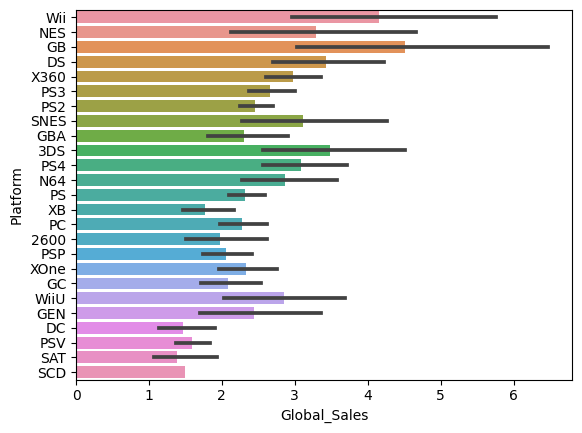

In [ ]:
#We only care about the global sales, so we want to make a data visualizations of the global sales that includes Platform, Year, Genre, and Publisher.

sns.barplot(x='Global_Sales', y='Platform', data=game_sale, orient='h')

<Axes: xlabel='Global_Sales', ylabel='Year'>

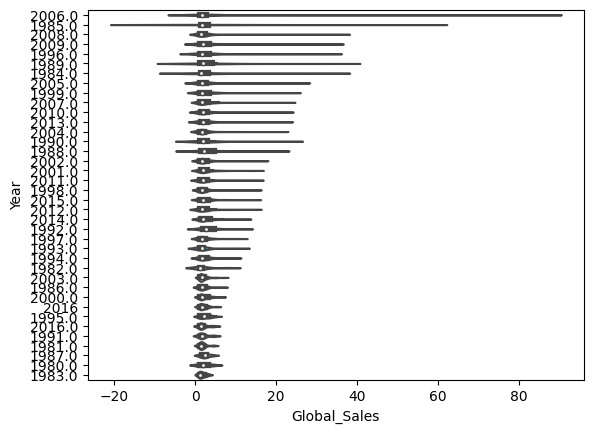

In [ ]:
sns.violinplot(x='Global_Sales', y='Year', data=game_sale)

<Axes: xlabel='Global_Sales', ylabel='Genre'>

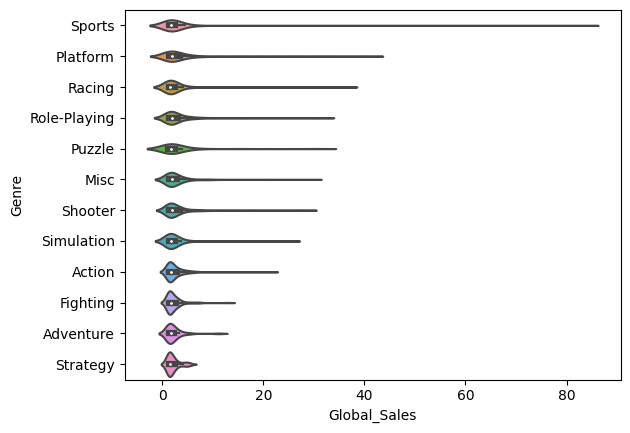

In [ ]:
sns.violinplot(x='Global_Sales', y='Genre', data=game_sale)

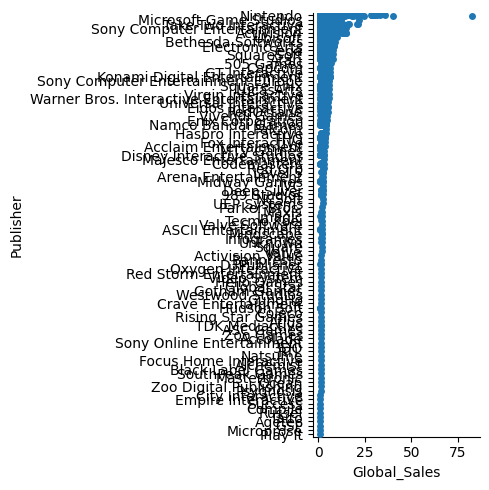

In [ ]:
sns.catplot(x='Global_Sales', y='Publisher', data=game_sale)

In [ ]:
#checking for the unique names for the object columns
display(game_sale['Name'].unique())
display(game_sale['Platform'].unique())
display(game_sale['Year'].unique())
display(game_sale['Genre'].unique())
display(game_sale['Publisher'].unique())

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Naruto: Clash of Ninja 2', 'Dance Dance Revolution SuperNOVA',
       'Brink'], dtype=object)

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD'], dtype=object)

array([2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 1984.0, 2005.0,
       1999.0, 2007.0, 2010.0, 2013.0, 2004.0, 1990.0, 1988.0, 2002.0,
       2001.0, 2011.0, 1998.0, 2015.0, 2012.0, 2014.0, 1992.0, 1997.0,
       1993.0, 1994.0, 1982.0, 2003.0, 1986.0, 2000.0, '2016', 1995.0,
       2016.0, 1991.0, 1981.0, 1987.0, 1980.0, 1983.0], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [ ]:
#Creating a new column called Name Category since the titles in Name are long
game_sale['Name_category'] = ''

In [ ]:
# creating a class in order to simplify the titles
def adjust(row):
    a = row['Name'].lower().split(' ')
    if (a[0]=='just') or (a[0]=='street') or (a[0]=='brian') or (a[0]=='gran') or (a[0]=="assassin's")or (a[0]=="the") :
            row['Name_category'] = str.join(' ',[row['Name_category'],a[0],a[1]])
    elif (a[0]=='call') or (a[0]=='metal') or (a[0]=='need') or (a[0]=='lego') or (a[0]=="god") :
            row['Name_category'] = str.join(' ',[row['Name_category'],a[0],a[1]])
    else :
            row['Name_category'] = str.join(' ',[row['Name_category'],a[0]])

    return row['Name_category']

In [ ]:
#using a for loop to run all of the titles from Name and simpifying it onto Name Category
for i in range (game_sale.shape[0]):
    game_sale.iloc[i,-1]=adjust(game_sale.iloc[i])

<ipython-input-104-5ad2aae58220>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Name_category'] = str.join(' ',[row['Name_category'],a[0]])
<ipython-input-104-5ad2aae58220>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Name_category'] = str.join(' ',[row['Name_category'],a[0],a[1]])
<ipython-input-104-5ad2aae58220>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Name_category'] = str.join(' ',[row['Name_category'],

In [ ]:
#Dropping Name column since we don't need it anymore
game_sale = game_sale.drop('Name',axis= 1)

In [ ]:
#Rechecking our information from game_sale
game_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Platform       2000 non-null   object 
 1   Year           2000 non-null   object 
 2   Genre          2000 non-null   object 
 3   Publisher      2000 non-null   object 
 4   NA_Sales       2000 non-null   float64
 5   EU_Sales       2000 non-null   float64
 6   JP_Sales       2000 non-null   float64
 7   Other_Sales    2000 non-null   float64
 8   Global_Sales   2000 non-null   float64
 9   Name_category  2000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 156.4+ KB


In [ ]:
#Checking for the unique values in 'Name_category'
game_sale['Name_category'].unique()

array([' wii', ' super', ' mario', ' pokemon', ' tetris', ' new', ' duck',
       ' nintendogs', ' kinect', ' grand', ' brain', ' gran turismo',
       ' call of', ' pokémon', ' animal', ' halo', ' just dance',
       ' halo:', ' final', ' donkey', ' minecraft', ' the elder', ' fifa',
       ' the sims', ' goldeneye', ' pac-man', ' star', ' the legend',
       ' crash', ' battlefield', ' need for', ' tekken', ' fallout',
       ' medal', ' uncharted', ' zumba', ' gears', ' big', ' red',
       " assassin's creed", ' kingdom', ' street fighter', ' world',
       ' driver', ' metal gear', ' sonic', ' the last',
       ' littlebigplanet', ' dragon', ' lego star', ' resident',
       ' cooking', ' destiny', ' batman:', ' forza', ' monster', ' dr.',
       ' professor', ' tomb', ' madden', ' diablo', ' tomodachi',
       " kirby's", ' fable', ' microsoft', ' guitar', ' tony', ' warzone',
       ' spyro', " link's", ' uncharted:', ' diddy', ' god of',
       ' starcraft', ' the simpsons:', '

* After checking for the unique values of the categorical columns, we would need to do **label encoding** in order to make predictive models.

In [ ]:
#Label Encoding for Categorical columns

from sklearn.preprocessing import LabelEncoder

col = ['Name_category', 'Platform', 'Genre', 'Publisher']

for i in col:
  le = LabelEncoder()
  game_sale[i] = le.fit_transform(game_sale[i])


In [ ]:
#changing Year from object to float
game_sale['Year'] = pd.to_numeric(game_sale['Year'])

In [ ]:
#Rechecking to see if the dataset has no categorical columns
display(game_sale.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Platform       2000 non-null   int64  
 1   Year           2000 non-null   float64
 2   Genre          2000 non-null   int64  
 3   Publisher      2000 non-null   int64  
 4   NA_Sales       2000 non-null   float64
 5   EU_Sales       2000 non-null   float64
 6   JP_Sales       2000 non-null   float64
 7   Other_Sales    2000 non-null   float64
 8   Global_Sales   2000 non-null   float64
 9   Name_category  2000 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 156.4 KB


None

In [ ]:
#Finding high correlation of the dataset
display(game_sale.corr())

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_category
Platform,1.000000,0.355057,0.003228,-0.024988,0.050481,0.048998,-0.234805,0.071738,0.002617,-0.059499
Year,0.355057,1.000000,-0.037429,0.057255,-0.051938,0.140356,-0.227007,0.184533,-0.005500,-0.083250
Genre,0.003228,-0.037429,1.000000,-0.168225,0.010243,0.020161,0.039477,0.004066,0.021242,-0.033991
Publisher,-0.024988,0.057255,-0.168225,1.000000,0.017234,0.026179,0.088082,0.029895,0.040752,0.077493
NA_Sales,0.050481,-0.051938,0.010243,0.017234,1.000000,0.701601,0.382836,0.541507,0.924763,0.022191
EU_Sales,0.048998,0.140356,0.020161,0.026179,0.701601,1.000000,0.362732,0.657900,0.875130,-0.001694
JP_Sales,-0.234805,-0.227007,0.039477,0.088082,0.382836,0.362732,1.000000,0.190357,0.566115,0.021390
Other_Sales,0.071738,0.184533,0.004066,0.029895,0.541507,0.657900,0.190357,1.000000,0.682249,-0.047774
Global_Sales,0.002617,-0.005500,0.021242,0.040752,0.924763,0.875130,0.566115,0.682249,1.000000,0.009744
Name_category,-0.059499,-0.083250,-0.033991,0.077493,0.022191,-0.001694,0.021390,-0.047774,0.009744,1.000000


In [ ]:
#Creating a new Dataframe for the factor columns
game_sale_2 = pd.DataFrame()
new_col = ['Platform', 'Genre', 'Publisher', 'NA_Sales', 'Name_category']

for i in new_col:
  game_sale_2[i] = game_sale[i]

* Now we would need to seperate the indpendent and dependent variables to predict our dataset

In [ ]:
X = game_sale_2.values #independent varaible
Y = game_sale['Global_Sales'].values #dependent variable

In [ ]:
#Using train_test_split to split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

**Statistical Model Building**

In [ ]:
#importing statistical packages that we need for the model building
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import r2_score

In [ ]:
#creating a class for our predictive model

class PredictiveModel():

  def __init__(self, X_train, X_test, Y_train, Y_test):
    self.X_train = X_train
    self.X_test = X_test
    self.Y_train = Y_train
    self.Y_test = Y_test

  def get_score(self, model):
    print("Test accuracy:", model.score(self.X_test, self.Y_test))
    print("Train accuracy:", model.score(self.X_train, self.Y_train))

  def evaluation(self,model, y_pred):
    from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

    mse = mean_squared_error(self.Y_test, y_pred)
    print("Mean squared error:", mse)

    mae = mean_absolute_error(self.Y_test, y_pred)
    print("Mean absolute error:", mae)

    mape = mean_absolute_percentage_error(self.Y_test, y_pred)
    print("Mean absolute percentage error:", mape)

    r2 = r2_score(self.Y_test, y_pred)
    print("R-squared:", r2)

    return [model, mse, mae, mape, r2]

  def graph(self, y_pred):
    #Creating a new DataFrame for Y_test and y_pred of our choice
    df = pd.DataFrame({"Y_test": self.Y_test, "y_pred":y_pred})

    plt.figure(figsize=(12,6))
    plt.plot(df[:100])
    plt.legend(["Actual", "Predicted"])



In [ ]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
pm = PredictiveModel(X_train, X_test, Y_train, Y_test)

#want to get score and evaluation using Linear Regression
pm.get_score(lr)
pm.evaluation(lr, y_pred_lr)

Test accuracy: 0.7670027165561418
Train accuracy: 0.8654584898222882
Mean squared error: 1.2067643446231169
Mean absolute error: 0.7601165027431139
Mean absolute percentage error: 0.32829132781301984
R-squared: 0.7670027165561418


[LinearRegression(),
 1.2067643446231169,
 0.7601165027431139,
 0.32829132781301984,
 0.7670027165561418]

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=0.1)
lasso_r.fit(X_train, Y_train)


Lasso(alpha=0.1)

In [ ]:
y_pred_lasso = lasso_r.predict(X_test)

In [ ]:
pm.get_score(lasso_r)
pm.evaluation(lasso_r, y_pred_lasso)

Test accuracy: 0.7676805996439631
Train accuracy: 0.8652500603871278
Mean squared error: 1.2032533803401249
Mean absolute error: 0.7571220365119469
Mean absolute percentage error: 0.32775349239560575
R-squared: 0.7676805996439631


[Lasso(alpha=0.1),
 1.2032533803401249,
 0.7571220365119469,
 0.32775349239560575,
 0.7676805996439631]

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, Y_train)

Ridge()

In [ ]:
y_pred_ridge = ridge.predict(X_test)

In [ ]:
pm.get_score(ridge)
pm.evaluation(ridge, y_pred_ridge)

Test accuracy: 0.7670086405275784
Train accuracy: 0.8654584738715423
Mean squared error: 1.2067336625593494
Mean absolute error: 0.7600855717520301
Mean absolute percentage error: 0.32828553158496865
R-squared: 0.7670086405275784


[Ridge(),
 1.2067336625593494,
 0.7600855717520301,
 0.32828553158496865,
 0.7670086405275784]

In [ ]:
#SVR
from sklearn.svm import SVR

#importing packages for SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.1, gamma=0.1, cache_size=4000))
regr.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, cache_size=4000, gamma=0.1))])

In [ ]:
y_pred_regr = regr.predict(X_test)

In [ ]:
pm.get_score(regr)
pm.evaluation(regr, y_pred_regr)

Test accuracy: 0.8401583678469761
Train accuracy: 0.9479477087906889
Mean squared error: 0.827868804380766
Mean absolute error: 0.5383557119963284
Mean absolute percentage error: 0.20723731050488406
R-squared: 0.8401583678469761


[Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svr', SVR(C=100, cache_size=4000, gamma=0.1))]),
 0.827868804380766,
 0.5383557119963284,
 0.20723731050488406,
 0.8401583678469761]

In [ ]:
from xgboost.core import Objective
#XGBoost for Regression
import xgboost as xg

xg_r = xg.XGBRegressor(Objective ='reg:squarederror', n_estimators = 10, seed=123)
xg_r.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:03:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Objective" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(Objective='reg:squarederror', base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
y_pred_xg = xg_r.predict(X_test)

In [ ]:
pm.get_score(xg_r)
pm.evaluation(xg_r, y_pred_xg)

Test accuracy: 0.834509872842166
Train accuracy: 0.9528476425741439
Mean squared error: 0.857124091274396
Mean absolute error: 0.580222519993782
Mean absolute percentage error: 0.24940170814306298
R-squared: 0.834509872842166


[XGBRegressor(Objective='reg:squarederror', base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, ...),
 0.857124091274396,
 0.580222519993782,
 0.24940170814306298,
 0.834509872842166]

* Based off on our regression methods, we see that we have a better accuracy for both testing and training data in **SVR** and **XGBoost Regression**. However, we get similar results for **Linear Regression**, **Ridge Regression**, and **Lasso Regression** with accuracy score of approximately **0.76 for the testing data** and **0.86 for the training data**.

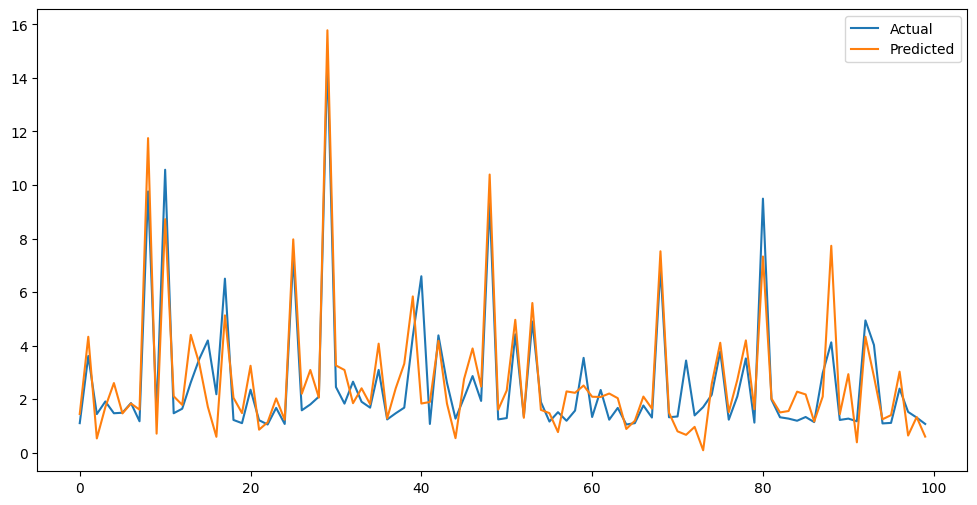

In [ ]:
#Graph for Linear Regression to see comparsion between Actual and Predicted
pm.graph(y_pred_lr)

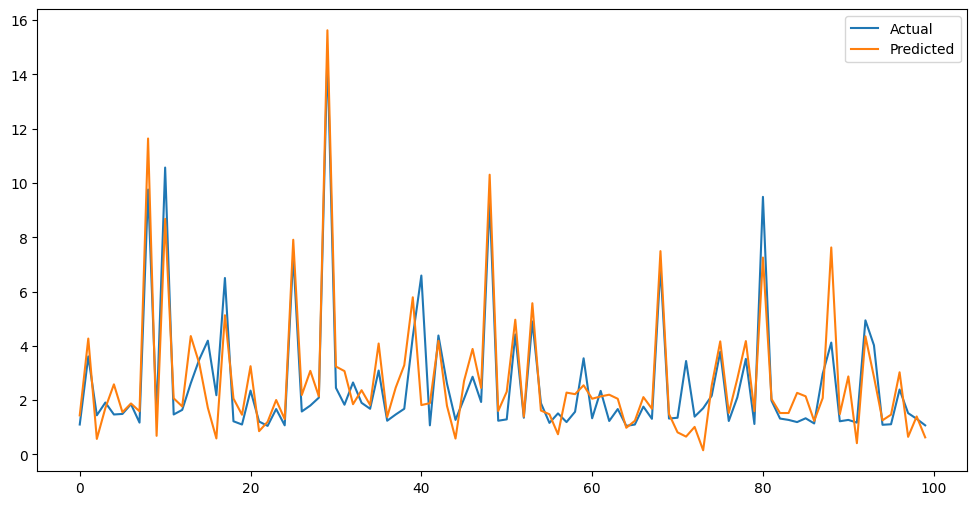

In [ ]:
#Graph for Lasso Regression to see the comparison between Actual and Predicted
pm.graph(y_pred_lasso)

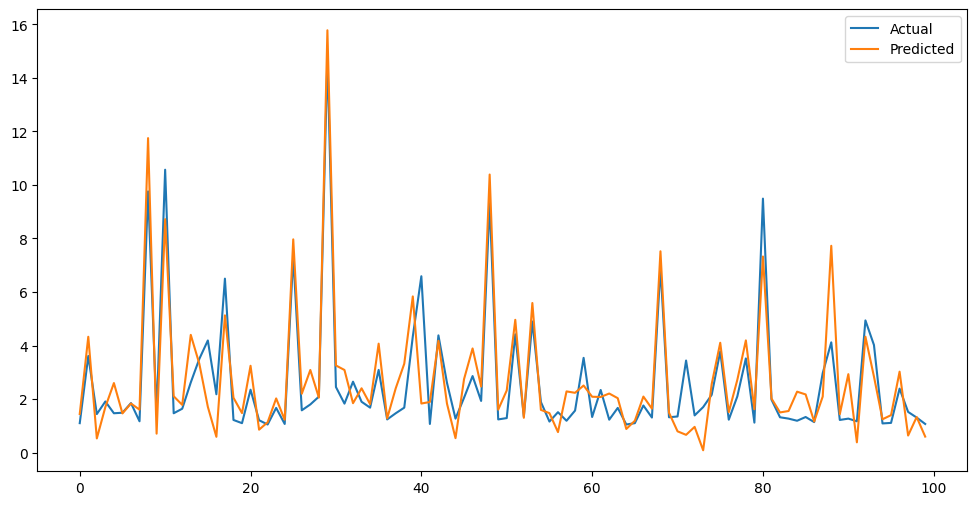

In [ ]:
#Graph for Ridge Regression for the comparison between Actual and Predicted
pm.graph(y_pred_ridge)

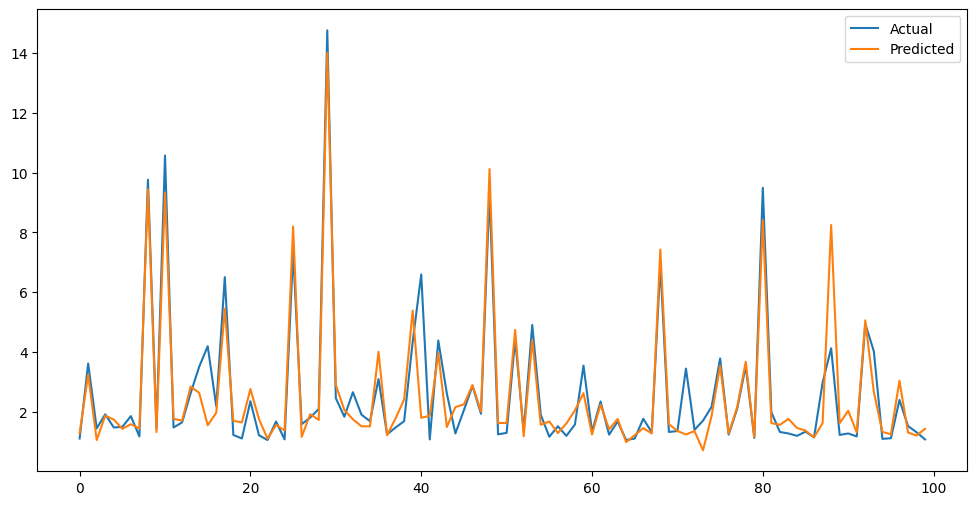

In [ ]:
#Graph for SVR for the comparison between Actual and Predicted
pm.graph(y_pred_regr)

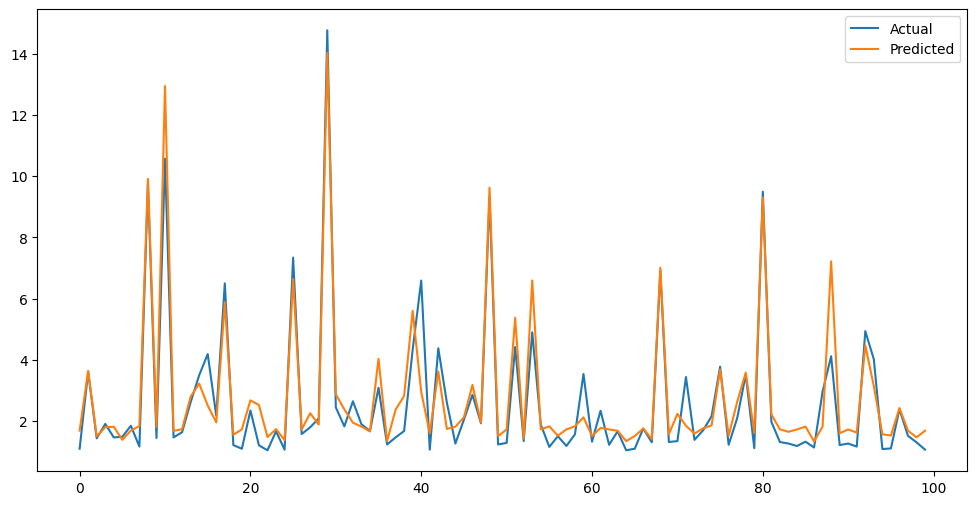

In [ ]:
#Graph for XGBoost for the comparsion between Actual and Predicted
pm.graph(y_pred_xg)

* Based on our graphs for the different regression methods, we see that **Linear Regression, Lasso Regression, and Ridge Regression** have a closer accuracy to the Actual and Predicted lines. However, we look at the **SVM and XGBoost** graphs and noticed that the predicted lines are either high and low comparing the actual lines.